# PDPbox library
Available methods--
1. 1D Partial Dependence Plots: View change in outcome variable with respect to change in a given predictive variable.
2. 2D Partial Dependence Plots: View change in outcome variable with respect to the change in values of two predictive variables.

## Building a model to interpret
1. Pdpbox library only works for sklearn models, so Keras models have to be wrapped as sklearn models.
2. The test data should also be an instance of Pandas DataFrame.

In [1]:
# For data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd

# For model
import tensorflow as tf
from tensorflow import keras

# For interpreting the model
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [2]:
# Loading the data
bc_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc_data.data, bc_data.target,
                                                   test_size=0.25, random_state=1)
feature_names = bc_data.feature_names

# Normalizing the predictive variables
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [3]:
X_train.shape

(426, 30)

In [4]:
y_train[0:3]

array([0, 1, 0])

In [5]:
# Building a MLP classification model with Keras API
def build_model():
    model = keras.models.Sequential([
        keras.layers.Input(shape=[30]),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                 optimizer=keras.optimizers.Adam(),
                 metrics=['accuracy'])
    
    return model

In [6]:
# Wrapping Keras model with a thin sklearn wrapper
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [7]:
# Model learning
history = keras_clf.fit(X_train, y_train,
             batch_size=32, epochs=100, verbose=0,
             validation_data=(X_test, y_test),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [8]:
# Convert data to Pandas DataFrame
X_test_pd = pd.DataFrame(X_test, columns=feature_names)

In [9]:
X_test_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.158502,-1.230490,0.253691,-0.000072,0.481010,1.551413,0.710235,0.362700,1.027135,1.658940,...,0.031770,-1.169849,0.191256,-0.134991,-0.046222,0.701791,0.254379,-0.057386,-0.086897,0.488639
1,-0.263804,-0.154510,-0.239618,-0.336484,1.401475,0.363674,0.428546,0.628921,1.181984,0.731180,...,-0.126708,0.363180,-0.135629,-0.219061,2.088118,1.046041,1.131352,1.413307,1.773885,2.021052
2,-0.324927,-0.761473,-0.354078,-0.394352,0.292568,-0.493658,-0.339183,-0.387326,-0.285396,0.278362,...,-0.513877,-0.916205,-0.540331,-0.512799,0.723762,-0.314101,-0.225577,-0.135423,0.872108,0.711794
3,1.164257,-0.172902,1.075067,1.065647,-0.767055,-0.390590,-0.085914,0.238293,-0.687267,-1.262989,...,1.004707,0.109536,0.917347,0.879249,-0.397442,-0.069691,0.410928,0.637442,0.570360,-0.858603
4,0.280749,2.408992,0.192834,0.175471,-0.961294,-1.148976,-0.523915,-0.548850,0.164404,-1.456211,...,0.192254,1.792518,0.075545,0.071301,-0.784685,-1.015177,-0.566159,-0.733455,0.617183,-1.317377


## 1D Partial Dependence Plots

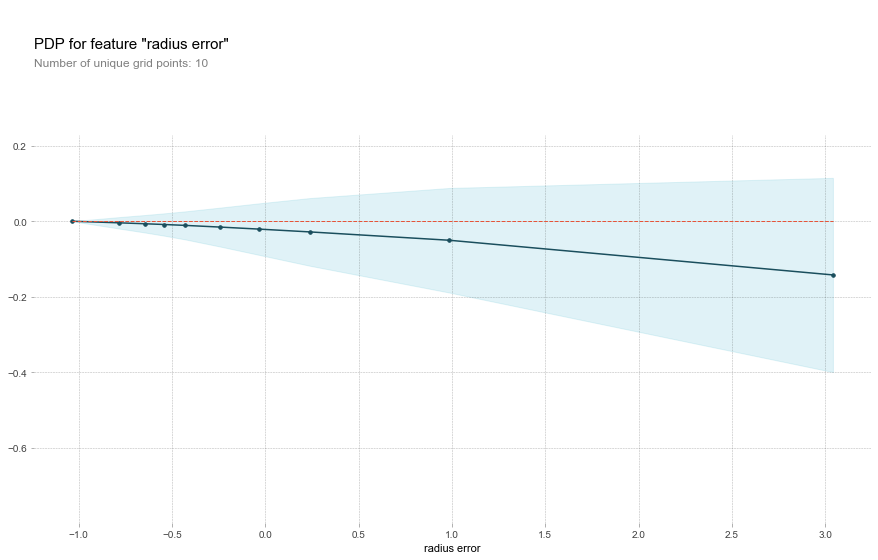

In [10]:
feature_to_viz = 'radius error'

# Create data to plot
pdp_att = pdp.pdp_isolate(model=keras_clf, 
                          dataset=X_test_pd,
                          model_features=feature_names,
                          feature=feature_to_viz)

# Plot
pdp.pdp_plot(pdp_att, feature_to_viz)
plt.show()

## 2D Partial Dependence Plots


TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

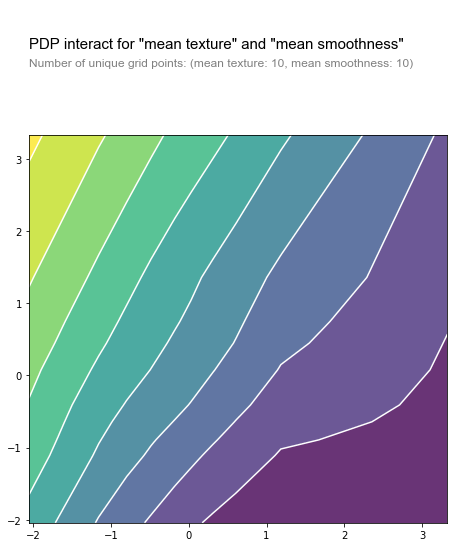

In [12]:
features_to_viz = ['mean texture', 'mean smoothness']

interact_out = pdp.pdp_interact(model=keras_clf,
                                dataset=X_test_pd,
                                model_features=feature_names,
                                features=features_to_viz)

pdp.pdp_interact_plot(pdp_interact_out=interact_out,
                      feature_names=features_to_viz, 
                      plot_type='contour')
plt.show()

### Note
1. If the 'mean texture' is high and 'mean smoothness' is low, there is a high probability of malignant breast cancer. Else if 'mean texture' is low and 'mean smoothness' is high, there is a low probability of malignant breast cancer.